In [1]:
import numpy as numpy
import pandas as pd

In [3]:
#заменим символы '*', '-' на nan для последующего удаления
raw_df =pd.read_excel('D:/Pycharm by URFU/Data Science spring/0103/solar_raw_2.xlsx', na_values=['*', '-'])
raw_df

,Дата,Время,Температура,Освещенность,День,Угол_солнечного_сколнения,Угол_высоты_Солнца,Влажность,Скорость_ветра
0,11.02.2017,4-30-00,21.24,0.212,42,NaN,0.0,0.71,7.2 ; / 2.0 m/s
1,11.02.2017,5-00-00,21.17,0.271,42,-14.586996,0.0,0.71,10.8 ; / 3.0 m/s
2,11.02.2017,5-30-00,20.98,0.306,42,NaN,NaN,0.71,10.8 ; / 3.0 m/s
3,11.02.2017,6-00-00,21.03,0.270,42,-14.586996,0.0,0.71,10.8 ; / 3.0 m/s
4,11.02.2017,6-30-00,21.24,0.239,42,-14.586996,0.0,0.71,10.8 ; / 3.0 m/s
...,...,...,...,...,...,...,...,...,...
174,14.02.2017,19-30-00,13.16,0.388,45,-13.619766,0.0,0.79,21.6 ; / 6.0 m/s
175,14.02.2017,20-00-00,12.96,0.388,45,-13.619766,0.0,0.79,14.4 ; / 4.0 m/s
176,14.02.2017,20-30-00,13.03,0.409,45,-13.619766,0.0,0.79,14.4 ; / 4.0 m/s
177,14.02.2017,21-00-00,1605.00,0.373,45,-13.619766,0.0,0.79,21.6 ; / 6.0 m/s


In [ ]:
#статистика до обработки
raw_df.describe()

,Температура,Освещенность,День,Угол_солнечного_сколнения,Угол_высоты_Солнца,Влажность
count,179.000000,179.000000,179.000000,177.000000,178.000000,165.000000
mean,27.760391,106.353872,43.541899,-14.086523,6.790437,0.727939
std,118.591305,160.559315,1.087301,0.348627,9.274854,0.040492
min,11.310000,0.161000,42.000000,-14.586996,0.000000,0.590000
25%,16.505000,0.245500,43.000000,-14.268783,0.000000,0.710000
50%,19.940000,0.373000,44.000000,-13.946341,0.000000,0.720000
75%,21.525000,183.428000,44.000000,-13.946341,15.234365,0.780000
max,1605.000000,593.542000,45.000000,-13.619766,25.080257,0.790000


In [ ]:
#колонки дата, время, скорость ветра имеют тип object, кот. нужно изменить на численный
raw_df.dtypes

Дата                          object
Время                         object
Температура                  float64
Освещенность                 float64
День                           int64
Угол_солнечного_сколнения    float64
Угол_высоты_Солнца           float64
Влажность                    float64
Скорость_ветра                object
dtype: object

In [ ]:
#колонки угол склонения, угол высоты, влажность, скорость ветра имеют пропуски и nan
raw_df.isnull().sum()

Дата                          0
Время                         0
Температура                   0
Освещенность                  0
День                          0
Угол_солнечного_сколнения     2
Угол_высоты_Солнца            1
Влажность                    14
Скорость_ветра               16
dtype: int64

In [ ]:
from numpy import int32

#создадим датафрейм, в кот. будут очищенные данные
clear_df = pd.DataFrame()

#разделим колонку с датой
tmp_df = raw_df['Дата'].str.split('.', expand=True).astype(int32)
clear_df['День'] = tmp_df[0]
clear_df['Месяц'] = tmp_df[1]
clear_df['Год'] = tmp_df[2]

#разделим колонку со временем
tmp_df2 = raw_df['Время'].str.split('-', expand=True).astype(int32)
clear_df['Часы'] = tmp_df2[0]
clear_df['Минуты'] = tmp_df2[1]

#разделим колонку со скоростью ветра и приведём к м/с
tmp_df3 = raw_df['Скорость_ветра'].str.split(';', expand=True)
clear_df['Скорость_ветра'] = tmp_df3[0].astype(float)/3.6

clear_df


,День,Месяц,Год,Часы,Минуты,Скорость_ветра
0,11,2,2017,4,30,2.0
1,11,2,2017,5,0,3.0
2,11,2,2017,5,30,3.0
3,11,2,2017,6,0,3.0
4,11,2,2017,6,30,3.0
...,...,...,...,...,...,...
174,14,2,2017,19,30,6.0
175,14,2,2017,20,0,4.0
176,14,2,2017,20,30,4.0
177,14,2,2017,21,0,6.0


In [ ]:
#добавим колонки без изменений
clear_df[['День', 'Температура', 'Освещенность', 'Угол_солнечного_сколнения','Угол_высоты_Солнца','Влажность']]\
     = raw_df[['День', 'Температура', 'Освещенность', 'Угол_солнечного_сколнения','Угол_высоты_Солнца','Влажность']]
clear_df

,День,Месяц,Год,Часы,Минуты,Скорость_ветра,Температура,Освещенность,Угол_солнечного_сколнения,Угол_высоты_Солнца,Влажность
0,42,2,2017,4,30,2.0,21.24,0.212,NaN,0.0,0.71
1,42,2,2017,5,0,3.0,21.17,0.271,-14.586996,0.0,0.71
2,42,2,2017,5,30,3.0,20.98,0.306,NaN,NaN,0.71
3,42,2,2017,6,0,3.0,21.03,0.270,-14.586996,0.0,0.71
4,42,2,2017,6,30,3.0,21.24,0.239,-14.586996,0.0,0.71
...,...,...,...,...,...,...,...,...,...,...,...
174,45,2,2017,19,30,6.0,13.16,0.388,-13.619766,0.0,0.79
175,45,2,2017,20,0,4.0,12.96,0.388,-13.619766,0.0,0.79
176,45,2,2017,20,30,4.0,13.03,0.409,-13.619766,0.0,0.79
177,45,2,2017,21,0,6.0,1605.00,0.373,-13.619766,0.0,0.79


In [ ]:
#заполним пропуски интерполяцией
clear_df.interpolate('bfill', inplace=True)
clear_df


,День,Месяц,Год,Часы,Минуты,Скорость_ветра,Температура,Освещенность,Угол_солнечного_сколнения,Угол_высоты_Солнца,Влажность
0,42,2,2017,4,30,2.0,21.24,0.212,-14.586996,0.0,0.71
1,42,2,2017,5,0,3.0,21.17,0.271,-14.586996,0.0,0.71
2,42,2,2017,5,30,3.0,20.98,0.306,-14.586996,0.0,0.71
3,42,2,2017,6,0,3.0,21.03,0.270,-14.586996,0.0,0.71
4,42,2,2017,6,30,3.0,21.24,0.239,-14.586996,0.0,0.71
...,...,...,...,...,...,...,...,...,...,...,...
174,45,2,2017,19,30,6.0,13.16,0.388,-13.619766,0.0,0.79
175,45,2,2017,20,0,4.0,12.96,0.388,-13.619766,0.0,0.79
176,45,2,2017,20,30,4.0,13.03,0.409,-13.619766,0.0,0.79
177,45,2,2017,21,0,6.0,1605.00,0.373,-13.619766,0.0,0.79


In [ ]:
#статистика после обработки. основные показатели не изменились
clear_df.describe()

,День,Месяц,Год,Часы,Минуты,Скорость_ветра,Температура,Освещенность,Угол_солнечного_сколнения,Угол_высоты_Солнца,Влажность
count,179.000000,179.0,179.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,43.541899,2.0,2017.0,11.743017,15.083799,3.932961,27.760391,106.353872,-14.092115,6.752501,0.726983
std,1.087301,0.0,0.0,6.635866,15.041841,1.678006,118.591305,160.559315,0.350654,9.262680,0.040417
min,42.000000,2.0,2017.0,0.000000,0.000000,1.000000,11.310000,0.161000,-14.586996,0.000000,0.590000
25%,43.000000,2.0,2017.0,6.000000,0.000000,3.000000,16.505000,0.245500,-14.268783,0.000000,0.710000
50%,44.000000,2.0,2017.0,12.000000,30.000000,4.000000,19.940000,0.373000,-13.946341,0.000000,0.720000
75%,44.000000,2.0,2017.0,17.000000,30.000000,5.000000,21.525000,183.428000,-13.946341,15.161166,0.770000
max,45.000000,2.0,2017.0,23.000000,30.000000,8.000000,1605.000000,593.542000,-13.619766,25.080257,0.790000


In [ ]:
clear_df.to_excel('clear_df2.xlsx')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

Text(0.5, 1.0, 'Тепловая карта корреляции')

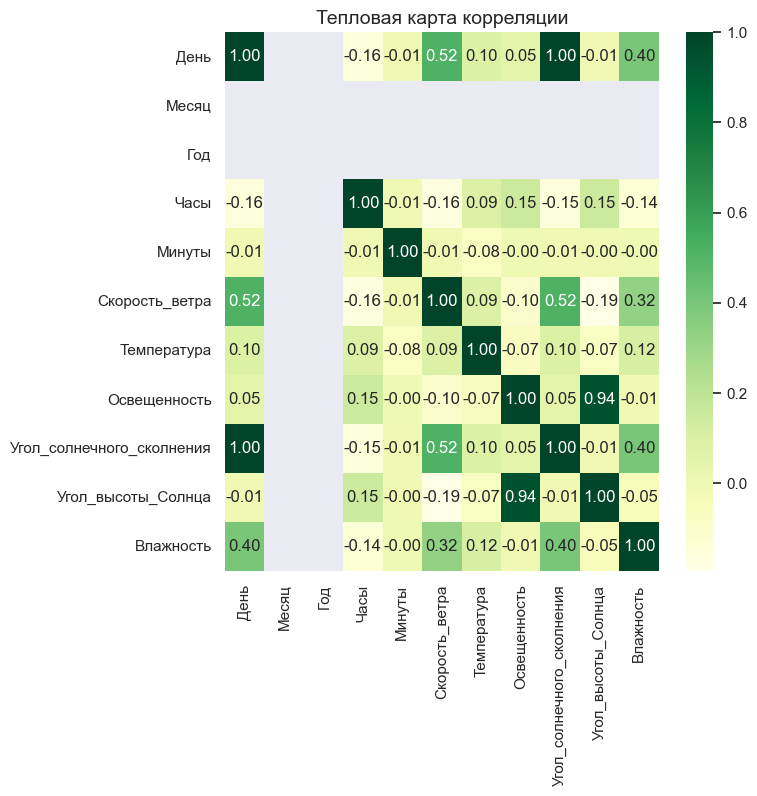

In [ ]:
#построим тепловую карту по матрице корреляции
plt.figure(figsize=(7,7))
ax = plt.axes()
sns.heatmap(clear_df.corr(), cmap='YlGn', annot=True, fmt = '.2f')
ax.set_title('Тепловая карта корреляции', fontsize=14)

<AxesSubplot:>

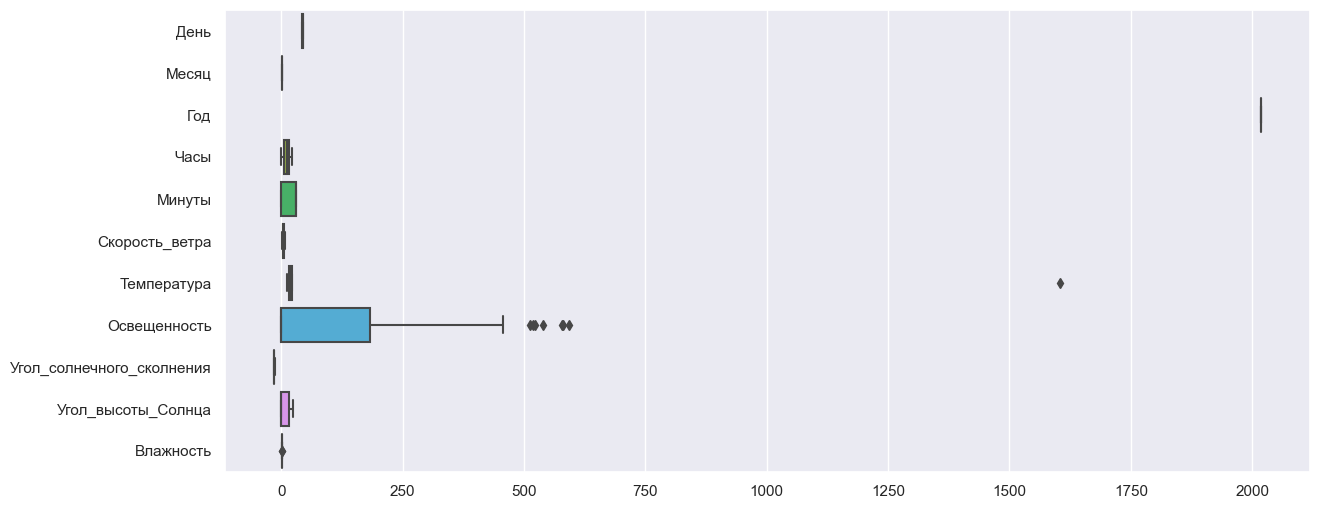

In [ ]:
#построим boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=clear_df, orient='h')